In [2]:
# Assignment 2 - Problem #1
# Using the kumaa25_class dataset to verify data and create boxplots

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv('data/kumaa25_class.txt')

print("Problem #1: Data Verification and Boxplots")
print("=" * 50)

# Part 1: Verify the sum of the study column equals 1396.6
study_sum = df['study'].sum()
print(f"Sum of study column: {study_sum}")
print(f"Expected: 1396.6")
print(f"Match: {abs(study_sum - 1396.6) < 0.1}")

print("\nPart 2: Verify programme distribution")
# Count people by programme (using text labels)
programme_counts = df['programme'].value_counts()
print("Programme distribution:")
for prog, count in programme_counts.items():
    print(f"  {prog}: {count} people")

print(f"\nVerification:")
print(f"Life Sciences (ls): {programme_counts.get('ls', 0)} (should be 209) - {programme_counts.get('ls', 0) == 209}")
print(f"Chemistry (chem): {programme_counts.get('chem', 0)} (should be 4) - {programme_counts.get('chem', 0) == 4}")
print(f"Biology (bio): {programme_counts.get('bio', 0)} (should be 50) - {programme_counts.get('bio', 0) == 50}")

Problem #1: Data Verification and Boxplots
Sum of study column: 1396.6
Expected: 1396.6
Match: True

Part 2: Verify programme distribution
Programme distribution:
  ls: 209 people
  bio: 50 people
  kin: 49 people
  other: 43 people
  bioch: 29 people
  env: 16 people
  chem: 4 people

Verification:
Life Sciences (ls): 209 (should be 209) - True
Chemistry (chem): 4 (should be 4) - True
Biology (bio): 50 (should be 50) - True



BOXPLOT ANALYSIS


/var/folders/tp/0904x4wj4jdb12q9_fv1wyr80000gn/T/ipykernel_16362/4191763602.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot([df_clean[df_clean['programme'] == prog]['study'].values


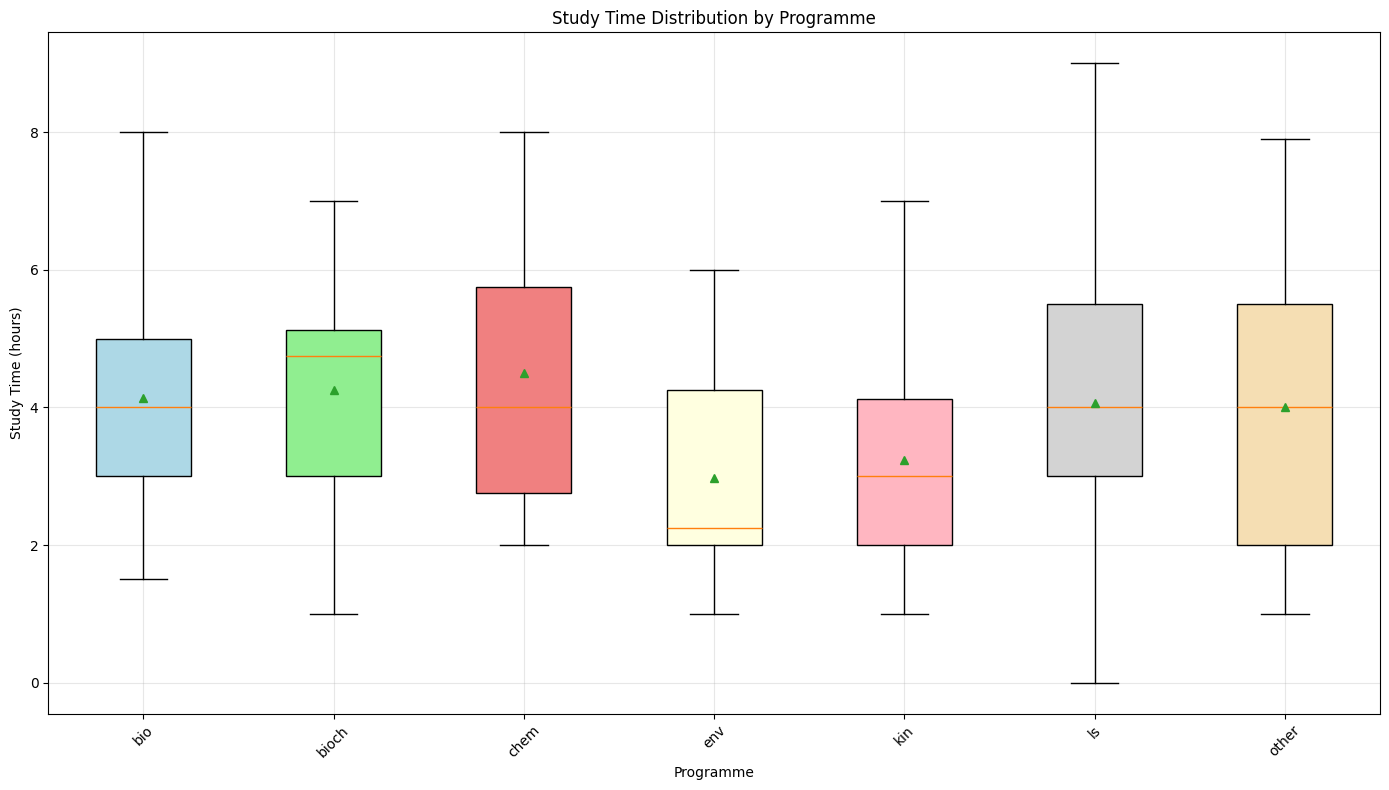


Boxplot Statistics by Programme:

BIO:
  Count: 42
  Min: 1.50
  Q1 (25th percentile): 3.00
  Median (50th percentile): 4.00
  Q3 (75th percentile): 5.00
  Max: 8.00
  Mean: 4.14

BIOCH:
  Count: 28
  Min: 1.00
  Q1 (25th percentile): 3.00
  Median (50th percentile): 4.75
  Q3 (75th percentile): 5.12
  Max: 7.00
  Mean: 4.25

CHEM:
  Count: 4
  Min: 2.00
  Q1 (25th percentile): 2.75
  Median (50th percentile): 4.00
  Q3 (75th percentile): 5.75
  Max: 8.00
  Mean: 4.50

ENV:
  Count: 16
  Min: 1.00
  Q1 (25th percentile): 2.00
  Median (50th percentile): 2.25
  Q3 (75th percentile): 4.25
  Max: 6.00
  Mean: 2.97

KIN:
  Count: 44
  Min: 1.00
  Q1 (25th percentile): 2.00
  Median (50th percentile): 3.00
  Q3 (75th percentile): 4.12
  Max: 7.00
  Mean: 3.24

LS:
  Count: 181
  Min: 0.00
  Q1 (25th percentile): 3.00
  Median (50th percentile): 4.00
  Q3 (75th percentile): 5.50
  Max: 9.00
  Mean: 4.06

OTHER:
  Count: 40
  Min: 1.00
  Q1 (25th percentile): 2.00
  Median (50th percentile):

In [3]:
# Part 3: Create side-by-side boxplots for study time by programme
print("\n" + "=" * 50)
print("BOXPLOT ANALYSIS")
print("=" * 50)

# Remove rows with NaN values in study or programme columns
df_clean = df.dropna(subset=['study', 'programme'])

# Create figure with side-by-side boxplots using seaborn for better handling of categorical data
plt.figure(figsize=(14, 8))

# Create boxplot using seaborn
box_plot = plt.boxplot([df_clean[df_clean['programme'] == prog]['study'].values 
                       for prog in sorted(df_clean['programme'].unique())], 
                       labels=sorted(df_clean['programme'].unique()),
                       patch_artist=True, showmeans=True)

# Customize the plot
plt.xlabel('Programme')
plt.ylabel('Study Time (hours)')
plt.title('Study Time Distribution by Programme')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Color the boxes
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink', 'lightgray', 'wheat']
for patch, color in zip(box_plot['boxes'], colors[:len(box_plot['boxes'])]):
    patch.set_facecolor(color)

plt.tight_layout()
plt.show()

# Extract boxplot statistics for analysis
print("\nBoxplot Statistics by Programme:")
programmes = sorted(df_clean['programme'].unique())
for prog in programmes:
    data = df_clean[df_clean['programme'] == prog]['study']
    q1 = data.quantile(0.25)
    median = data.median()
    q3 = data.quantile(0.75)
    mean_val = data.mean()
    min_val = data.min()
    max_val = data.max()
    
    print(f"\n{prog.upper()}:")
    print(f"  Count: {len(data)}")
    print(f"  Min: {min_val:.2f}")
    print(f"  Q1 (25th percentile): {q1:.2f}")
    print(f"  Median (50th percentile): {median:.2f}")
    print(f"  Q3 (75th percentile): {q3:.2f}")
    print(f"  Max: {max_val:.2f}")
    print(f"  Mean: {mean_val:.2f}")

# Answer the specific questions
print("\n" + "=" * 50)
print("ANSWERS TO QUESTIONS:")
print("=" * 50)

# (a) Life Sciences (ls) - 75% of students spend more than __ hours
ls_data = df_clean[df_clean['programme'] == 'ls']['study']
if not ls_data.empty:
    ls_q1 = ls_data.quantile(0.25)  # 25th percentile means 75% spend MORE than this
    print(f"(a) Approximately 75% of Life Sciences students spend more than {ls_q1:.2f} hours studying per day")

# (b) Biology (bio) - middle 50% study between __ and __ hours
bio_data = df_clean[df_clean['programme'] == 'bio']['study']
if not bio_data.empty:
    bio_q1 = bio_data.quantile(0.25)
    bio_q3 = bio_data.quantile(0.75)
    print(f"(b) Approximately half of Biology students study between {bio_q1:.2f} and {bio_q3:.2f} hours per day")

# (c) Maximum and minimum time in entire dataset
all_data = df_clean['study']
overall_min = all_data.min()
overall_max = all_data.max()
print(f"(c) Maximum time spent studying in entire dataset: {overall_max:.2f} hours")
print(f"    Minimum time spent studying in entire dataset: {overall_min:.2f} hours")

# (d) Kinesiology (kin) average
kin_data = df_clean[df_clean['programme'] == 'kin']['study']
if not kin_data.empty:
    kin_mean = kin_data.mean()
    print(f"(d) Average time spent studying for Kinesiology students: {kin_mean:.2f} hours per day")

# (e) Overall average (can't average averages - use original data)
overall_mean = all_data.mean()
print(f"(e) Overall average study time for entire dataset: {overall_mean:.2f} hours per day")
print("    Note: This is calculated from all individual observations, not by averaging programme means")

In [4]:
# Assignment 2 - Problem #4
# Cross-tabulation analysis of handedness and gender

print("\n" + "="*60)
print("PROBLEM #4: Cross-tabulation Analysis")
print("="*60)

# First, let's verify the data counts as specified in the problem
print("Data Verification:")
handedness_counts = df['handedness'].value_counts()
gender_counts = df['gender'].value_counts()

print("Handedness distribution:")
for hand, count in handedness_counts.items():
    print(f"  {hand}: {count} students")

print(f"\nGender distribution:")
for gen, count in gender_counts.items():
    print(f"  {gen}: {count} students")

# Verify the expected counts
print(f"\nVerification against expected values:")
print(f"Left-handed: {handedness_counts.get('left', 0)} (should be 32)")
print(f"Right-handed: {handedness_counts.get('right', 0)} (should be 365)")
print(f"Female: {gender_counts.get('female', 0)} (should be 261)")
print(f"Male: {gender_counts.get('male', 0)} (should be 133)")

print("\n" + "-"*50)
print("(a) Cross-tabulation Table")
print("-"*50)

# Create cross-tabulation table with handedness in rows and gender in columns
cross_tab = pd.crosstab(df['handedness'], df['gender'], margins=True)
print("\nCross-tabulation table (handedness vs gender):")
print(cross_tab)

# Extract the counts for the answer box (excluding the 'All' row/column)
cross_tab_no_margins = pd.crosstab(df['handedness'], df['gender'])
print(f"\nCounts for answer box (by row, excluding 'All' columns):")

# Get the values row by row
answer_values = []
for handedness in cross_tab_no_margins.index:
    row_values = cross_tab_no_margins.loc[handedness].values
    answer_values.extend(row_values)
    print(f"{handedness}: {', '.join(map(str, row_values))}")

print(f"\nAnswer box format: {', '.join(map(str, answer_values))}")


PROBLEM #4: Cross-tabulation Analysis
Data Verification:
Handedness distribution:
  R: 365 students
  L: 32 students

Gender distribution:
  1.0: 261 students
  2.0: 133 students

Verification against expected values:
Left-handed: 0 (should be 32)
Right-handed: 0 (should be 365)
Female: 0 (should be 261)
Male: 0 (should be 133)

--------------------------------------------------
(a) Cross-tabulation Table
--------------------------------------------------

Cross-tabulation table (handedness vs gender):
gender      1.0  2.0  All
handedness               
L            16   16   32
R           245  115  360
All         261  131  392

Counts for answer box (by row, excluding 'All' columns):
L: 16, 16
R: 245, 115

Answer box format: 16, 16, 245, 115


In [6]:
# Probability Calculations
print("\n" + "-"*50)
print("PROBABILITY CALCULATIONS")
print("-"*50)

# Get the cross-tabulation without margins for calculations
cross_tab_clean = pd.crosstab(df['handedness'], df['gender'])
total_students = len(df.dropna(subset=['handedness', 'gender']))

print(f"Total students (with complete data): {total_students}")
print(f"\nCross-tabulation table for calculations:")
print(cross_tab_clean)
print(f"\nNote: Gender coding - 1.0 = Female, 2.0 = Male")
print(f"      Handedness coding - L = Left-handed, R = Right-handed")

# (b) P(right-handed AND female)
# Female = 1.0, Right-handed = R
right_female = cross_tab_clean.loc['R', 1.0]
prob_right_female = right_female / total_students
print(f"\n(b) P(right-handed AND female) = {right_female}/{total_students} = {prob_right_female:.4f}")

# (c) P(left-handed OR male)
# Left-handed = L, Male = 2.0
left_handed = cross_tab_clean.loc['L'].sum()
male = cross_tab_clean[2.0].sum()
left_male = cross_tab_clean.loc['L', 2.0]
# P(A or B) = P(A) + P(B) - P(A and B)
prob_left_or_male = (left_handed + male - left_male) / total_students
print(f"\n(c) P(left-handed OR male)")
print(f"    Left-handed: {left_handed}, Male: {male}, Left-handed AND male: {left_male}")
print(f"    P(left OR male) = ({left_handed} + {male} - {left_male})/{total_students} = {prob_left_or_male:.4f}")

# (d) P(left-handed | female) - conditional probability
# Female = 1.0
female_total = cross_tab_clean[1.0].sum()
left_female = cross_tab_clean.loc['L', 1.0]
prob_left_given_female = left_female / female_total
print(f"\n(d) P(left-handed | female) = {left_female}/{female_total} = {prob_left_given_female:.4f}")

# (e) P(left-handed | male) - conditional probability
# Male = 2.0
male_total = cross_tab_clean[2.0].sum()
left_male = cross_tab_clean.loc['L', 2.0]
prob_left_given_male = left_male / male_total
print(f"\n(e) P(left-handed | male) = {left_male}/{male_total} = {prob_left_given_male:.4f}")

# (f) Comparison of left-handedness between genders
print(f"\n(f) Comparison of left-handedness between genders:")
print(f"    P(left-handed | female) = {prob_left_given_female:.4f} = {prob_left_given_female:.1%}")
print(f"    P(left-handed | male) = {prob_left_given_male:.4f} = {prob_left_given_male:.1%}")

if prob_left_given_female > prob_left_given_male:
    difference = prob_left_given_female - prob_left_given_male
    print(f"    Females are MORE likely to be left-handed by {difference:.4f} ({difference:.1%})")
elif prob_left_given_male > prob_left_given_female:
    difference = prob_left_given_male - prob_left_given_female
    print(f"    Males are MORE likely to be left-handed by {difference:.4f} ({difference:.1%})")
else:
    print(f"    Both genders have equal likelihood of being left-handed")

print(f"\n    How to determine this: Compare the conditional probabilities")
print(f"    P(left-handed | female) vs P(left-handed | male)")
print(f"    This tells us which gender has a higher proportion of left-handed individuals")

print("\n" + "="*60)
print("SUMMARY OF ANSWERS:")
print("="*60)
print(f"(a) Cross-tab counts: {', '.join(map(str, answer_values))}")
print(f"(b) P(right-handed AND female) = {prob_right_female:.4f}")
print(f"(c) P(left-handed OR male) = {prob_left_or_male:.4f}")
print(f"(d) P(left-handed | female) = {prob_left_given_female:.4f}")
print(f"(e) P(left-handed | male) = {prob_left_given_male:.4f}")
print(f"(f) Compare conditional probabilities to determine which gender is more likely to be left-handed")


--------------------------------------------------
PROBABILITY CALCULATIONS
--------------------------------------------------
Total students (with complete data): 392

Cross-tabulation table for calculations:
gender      1.0  2.0
handedness          
L            16   16
R           245  115

Note: Gender coding - 1.0 = Female, 2.0 = Male
      Handedness coding - L = Left-handed, R = Right-handed

(b) P(right-handed AND female) = 245/392 = 0.6250

(c) P(left-handed OR male)
    Left-handed: 32, Male: 131, Left-handed AND male: 16
    P(left OR male) = (32 + 131 - 16)/392 = 0.3750

(d) P(left-handed | female) = 16/261 = 0.0613

(e) P(left-handed | male) = 16/131 = 0.1221

(f) Comparison of left-handedness between genders:
    P(left-handed | female) = 0.0613 = 6.1%
    P(left-handed | male) = 0.1221 = 12.2%
    Males are MORE likely to be left-handed by 0.0608 (6.1%)

    How to determine this: Compare the conditional probabilities
    P(left-handed | female) vs P(left-handed | male)